Estatísticas Descritivas:
mean: 773.774
median: 768.100
std_dev: 59.541
variance: 3545.074
coeff_var: 0.077
skewness: -1.004
kurtosis: 31.795
max_value: 1213.400


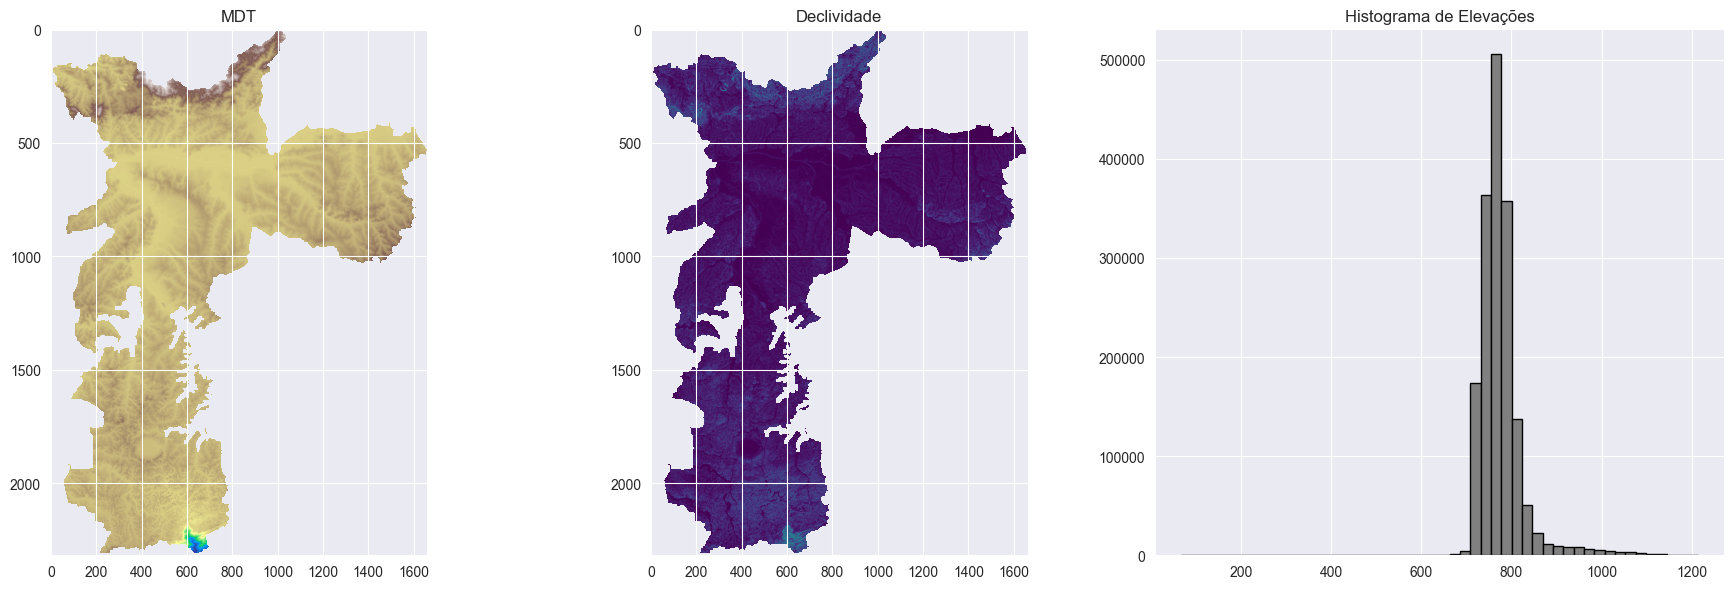

Dimensões do DEM: 1661 x 2319
Coordenadas X variam de -46.826388889 a -46.36527777777785
Coordenadas Y variam de -24.000277778222078 a -23.356388889


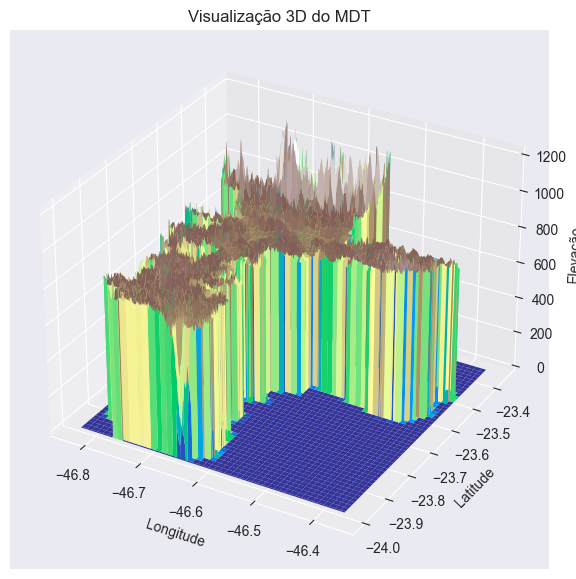

In [2]:
import numpy as np
import rasterio
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# Função para carregar o MDT
def load_mdt(filepath):
    with rasterio.open(filepath) as src:
        mdt = src.read(1)
        nodata = src.nodata
        profile = src.profile
    return mdt, nodata, profile

# Função para tratar valores nodata
def handle_nodata(mdt, nodata):
    if nodata is not None:
        mdt[mdt == nodata] = np.nan
    return mdt

# Função para calcular as estatísticas descritivas
def calculate_statistics(mdt):
    mdt_flat = mdt.flatten()
    mdt_flat = mdt_flat[~np.isnan(mdt_flat)]  # Remover NaNs para análise
    stats = {
        'mean': np.mean(mdt_flat),
        'median': np.median(mdt_flat),
        'std_dev': np.std(mdt_flat),
        'variance': np.var(mdt_flat),
        'coeff_var': np.std(mdt_flat) / np.mean(mdt_flat),
        'skewness': skew(mdt_flat),
        'kurtosis': kurtosis(mdt_flat),
        'max_value': np.max(mdt_flat)
    }
    return stats

# Função para calcular a declividade
def calculate_slope(mdt, profile):
    x, y = np.gradient(mdt, profile['transform'][0], profile['transform'][4])
    slope = np.sqrt(x**2 + y**2)
    return slope

# Função para visualizar o MDT, declividade e histograma das elevações
def visualize_data(mdt, slope):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Aumentar a área dos gráficos
    
    ax[0].imshow(mdt, cmap='terrain')
    ax[0].set_title('MDT')
    
    ax[1].imshow(slope, cmap='viridis')
    ax[1].set_title('Declividade')
    
    ax[2].hist(mdt.flatten(), bins=50, color='grey', edgecolor='black')
    ax[2].set_title('Histograma de Elevações')
    
    plt.tight_layout()  # Ajustar layout para melhor visualização
    plt.show()

# Função para verificar as dimensões e valores dos eixos X e Y
def check_coordinates(profile):
    width = profile['width']
    height = profile['height']
    transform = profile['transform']
    
    x = np.arange(0, width) * transform[0] + transform[2]
    y = np.arange(0, height) * transform[4] + transform[5]
    
    print(f"Dimensões do DEM: {width} x {height}")
    print(f"Coordenadas X variam de {x.min()} a {x.max()}")
    print(f"Coordenadas Y variam de {y.min()} a {y.max()}")

# Função para visualizar o MDT em 3D
def visualize_3d(mdt, profile):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    width = profile['width']
    height = profile['height']
    transform = profile['transform']
    
    x = np.arange(0, width) * transform[0] + transform[2]
    y = np.arange(0, height) * transform[4] + transform[5]
    x, y = np.meshgrid(x, y)
    z = np.nan_to_num(mdt)  # Substituir NaNs por zero ou outro valor adequado
    
    ax.plot_surface(x, y, z, cmap='terrain', edgecolor='none')
    
    ax.set_title('Visualização 3D do MDT')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Elevação')
    
    plt.show()

# Função principal
def main():
    # Caminho para o arquivo do MDT
    filepath = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/8_Dados/Produção novo DEM SP/Novo_DEM_SP.tif'
    
    # Carregar o MDT
    mdt, nodata, profile = load_mdt(filepath)
    
    # Tratar valores nodata
    mdt = handle_nodata(mdt, nodata)
    
    # Calcular estatísticas descritivas
    stats = calculate_statistics(mdt)
    print("Estatísticas Descritivas:")
    for key, value in stats.items():
        print(f"{key}: {value:.3f}")
    
    # Calcular declividade
    slope = calculate_slope(mdt, profile)
    
    # Visualizar MDT, declividade e histograma
    visualize_data(mdt, slope)
    
    # Verificar coordenadas
    check_coordinates(profile)
    
    # Visualizar MDT em 3D
    visualize_3d(mdt, profile)

if __name__ == "__main__":
    main()

In [17]:
# Caminho para o arquivo do MDT
filepath = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/8_Dados/Produção novo DEM SP/Novo_DEM_SP.tif'

In [4]:
# This is based on the tutorial hosted at https://github.com/mdbartos/pysheds?tab=readme-ov-file
# Read elevation raster
# ----------------------------
from pysheds.grid import Grid

grid = Grid.from_raster(filepath)
dem = grid.read_raster(filepath)

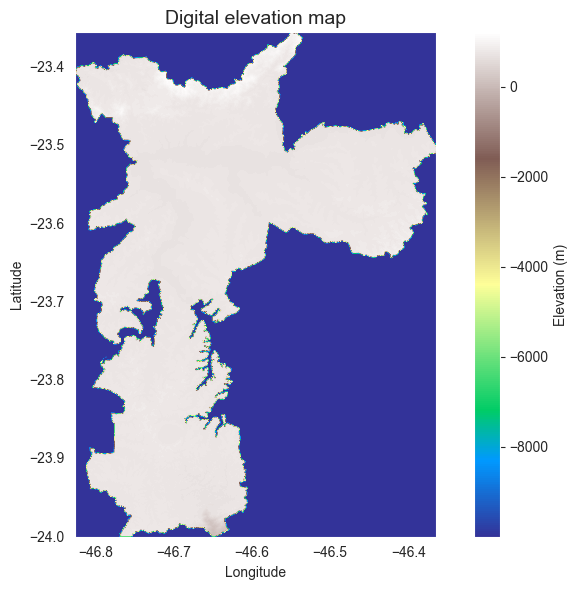

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [6]:
import rasterio

# Função para carregar o MDT
def load_mdt(filepath):
    with rasterio.open(filepath) as src:
        mdt = src.read(1)
        nodata = src.nodata
        profile = src.profile
    return mdt, nodata, profile

# Função para tratar valores nodata
def handle_nodata(mdt, nodata):
    if nodata is not None:
        mdt[mdt == nodata] = np.nan
    return mdt

In [7]:
# Carregar o MDT
mdt, nodata, profile = load_mdt(filepath)
    
# Tratar valores nodata
mdt = handle_nodata(mdt, nodata)

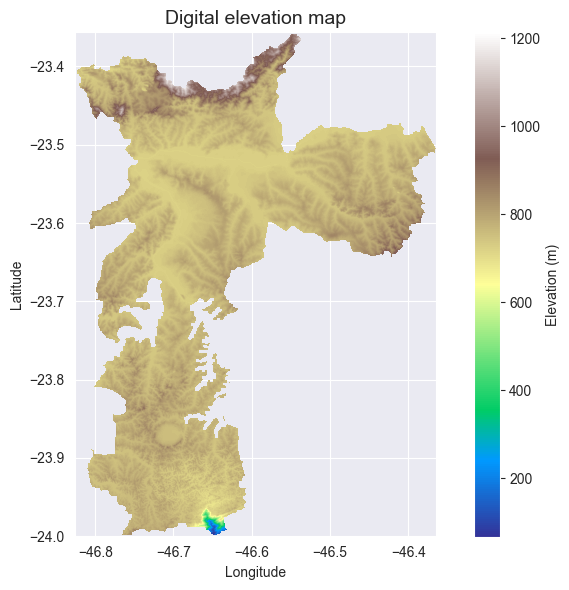

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(mdt, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [9]:
# Condition DEM
# ----------------------
# Fill pits in DEM
pit_filled_dem = grid.fill_pits(dem)

# Fill depressions in DEM
flooded_dem = grid.fill_depressions(pit_filled_dem)
    
# Resolve flats in DEM
inflated_dem = grid.resolve_flats(flooded_dem)

In [10]:
# Determine D8 flow directions from DEM
# ----------------------
# Specify directional mapping
dirmap = (64, 128, 1, 2, 4, 8, 16, 32)
    
# Compute flow directions
# -------------------------------------
fdir = grid.flowdir(inflated_dem, dirmap=dirmap)

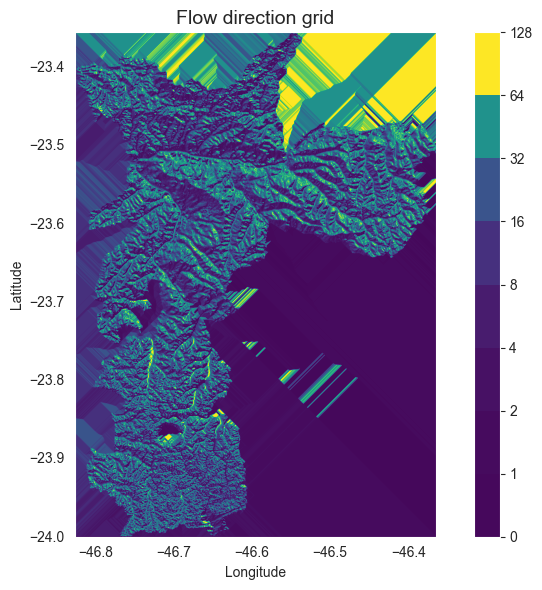

In [11]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(fdir, extent=grid.extent, cmap='viridis', zorder=2)
boundaries = ([0] + sorted(list(dirmap)))
plt.colorbar(boundaries= boundaries,
             values=sorted(dirmap))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flow direction grid', size=14)
plt.grid(zorder=-1)
plt.tight_layout()

In [12]:
# Calculate flow accumulation
# --------------------------
acc = grid.accumulation(fdir, dirmap=dirmap)

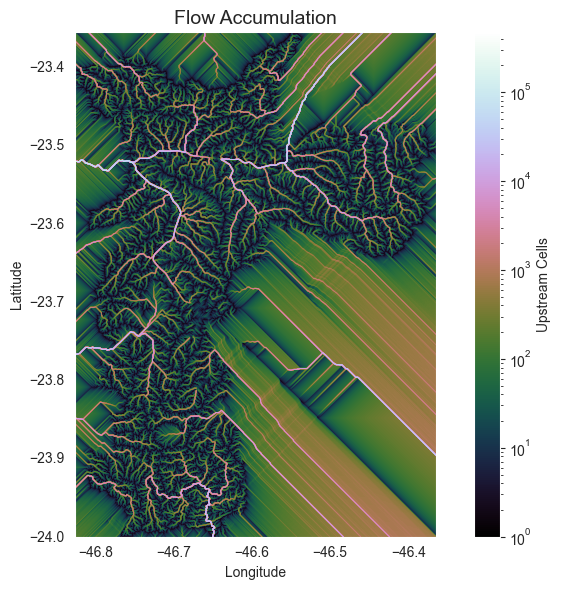

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.grid('on', zorder=0)
im = ax.imshow(acc, extent=grid.extent, zorder=2,
               cmap='cubehelix',
               norm=colors.LogNorm(1, acc.max()),
               interpolation='bilinear')
plt.colorbar(im, ax=ax, label='Upstream Cells')
plt.title('Flow Accumulation', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [14]:
# Extract river network
# ---------------------
branches = grid.extract_river_network(fdir, acc > 50, dirmap=dirmap)

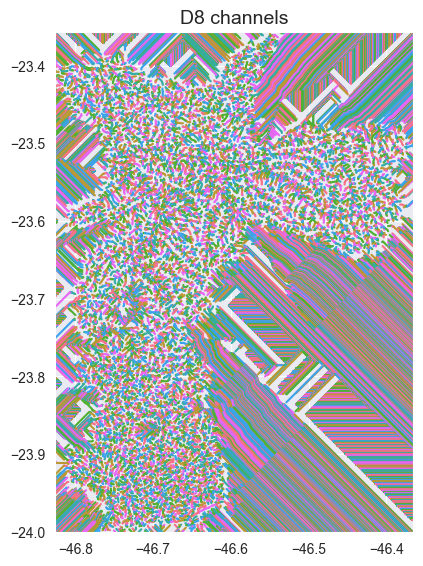

In [15]:
sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
ax.set_aspect('equal')

for branch in branches['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])
    
_ = plt.title('D8 channels', size=14)

In [18]:
import rasterio
import numpy as np

# Função para tratar valores nodata
def handle_nodata(mdt, nodata):
    if nodata is not None:
        mdt[mdt == nodata] = np.nan
    return mdt

# Carregar o arquivo raster original
input_filepath = filepath
output_filepath =  '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/8_Dados/Produção novo DEM SP/Novo_DEM_SP_corrigido.tif'

with rasterio.open(input_filepath) as src:
    mdt = src.read(1)  # Ler a primeira banda do raster
    nodata = src.nodata  # Obter o valor nodata original
    mdt_corrigido = handle_nodata(mdt, nodata)  # Tratar os valores nodata

    # Configurar o perfil de metadados para o arquivo de saída
    profile = src.profile
    profile.update(
        dtype=rasterio.float32,  # Certifique-se de que o tipo de dado esteja correto
        nodata=np.nan  # Definir o novo valor nodata
    )

    # Gravar o raster corrigido em um novo arquivo
    with rasterio.open(output_filepath, 'w', **profile) as dst:
        dst.write(mdt_corrigido.astype(rasterio.float32), 1)  # Escrever a banda corrigida
